In [1]:
import os
import pandas as pd
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_pickle('alignment_matrix.pkl')
df_targetlist = pd.read_pickle('all_blast_scores.pkl')

In [3]:
for i in range(len(df)):
    for j in range(len(df)):
        if j < i:
            df.iloc[j,i] = df.iloc[i,j]

# for i in range(len(df)):
#     for j in range(len(df)):
#         if df.iloc[i,j] == -1:
#             df.iloc[i,j] = 0

In [4]:
for i in range(len(df)):
    df.iloc[i,i] = 1000

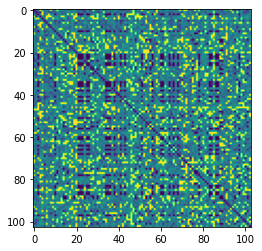

In [5]:
score_mat = df.to_numpy(dtype=float)
delta = 12 #this has to be appropriately weighted
test = np.exp(- score_mat ** 2 / (2. * delta ** 2))
plt.imshow(test)
plt.show()

/fslhome/cmorri97/anaconda3/envs/torch/lib/python3.9/site-packages/sklearn/cluster/_spectral.py:589: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


(array([47., 17.,  9.,  2.,  7.,  2.,  5.,  5.,  8.,  1.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

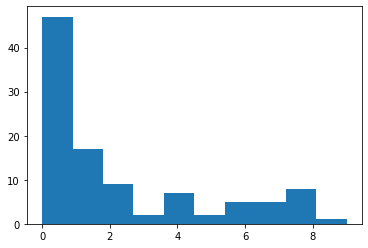

In [6]:
clustering = SpectralClustering(n_clusters=10, assign_labels='discretize', random_state=0).fit(test)
plt.hist(clustering.labels_)

In [7]:
clustering.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 8, 3, 0, 4, 0, 3, 0, 2,
       1, 2, 8, 1, 1, 6, 6, 0, 8, 0, 0, 7, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 4, 0, 0, 8, 0, 7, 1, 0, 8, 0, 6, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0,
       1, 4, 1, 0, 5, 0, 0, 0, 7, 8, 0, 0, 1, 7, 0, 0, 0, 1, 1, 9, 2, 2,
       6, 6, 4, 0, 4, 0, 4, 8, 7, 2, 0, 0, 5, 8, 0])

In [10]:
train_idxs = np.where((clustering.labels_==0) | (clustering.labels_==5) )
train_targets = np.array(df.columns)[train_idxs]
valid_idxs = np.where((clustering.labels_==2) | (clustering.labels_==3) | (clustering.labels_==7) | (clustering.labels_==8) | (clustering.labels_==9))
valid_targets = np.array(df.columns)[valid_idxs]
test_idxs = np.where((clustering.labels_==1) | (clustering.labels_==4) | (clustering.labels_==6))
test_targets = np.array(df.columns)[test_idxs]

In [11]:
for i in range(10):
    print(i)
    i_idxs = np.where(clustering.labels_==i)
    i_targets = np.array(df.columns)[i_idxs]
    print(i_targets)

0
['hivrt' 'ace' 'ptn1' 'casp3' 'hdac2' 'hivint' 'cp3a4' 'ada17' 'fa10'
 'ampc' 'hs90a' 'fa7' 'pnph' 'hivpr' 'aces' 'pygm' 'mmp13' 'nram' 'lkha4'
 'gria2' 'ada' 'kith' 'fabp4' 'pa2ga' 'parp1' 'hxk4' 'bace1' 'dpp4' 'try1'
 'cah2' 'ital' 'fpps' 'fnta' 'pde5a' 'xiap' 'def' 'hdac8' 'tryb1' 'urok'
 'grik1' 'kif11' 'thrb' 'MTORC1' 'KAT2A' 'TP53' 'PKM2' 'FEN1']
1
['mk14' 'vgfr2' 'met' 'kpcb' 'igf1r' 'kit' 'egfr' 'mapk2' 'plk1' 'csf1r'
 'src' 'fak1' 'lck' 'jak2' 'fgfr1' 'tgfr1' 'wee1']
2
['rock1' 'akt2' 'cdk2' 'braf' 'mk10' 'akt1' 'abl1' 'mk01' 'MAPK1']
3
['ppard' 'ppara']
4
['hmdh' 'pur2' 'reni' 'glcm' 'GBA' 'ALDH1' 'IDH1']
5
['adrb2' 'ADRB2']
6
['prgr' 'pparg' 'rxra' 'PPARG' 'VDR']
7
['aa2ar' 'adrb1' 'cxcr4' 'drd3' 'OPRK1']
8
['andr' 'esr1' 'thb' 'gcr' 'esr2' 'mcr' 'ESR1_ago' 'ESR1_ant']
9
['fkb1a']


In [12]:
print(train_targets)
print(valid_targets)
print(test_targets)

['hivrt' 'ace' 'ptn1' 'casp3' 'hdac2' 'hivint' 'cp3a4' 'ada17' 'fa10'
 'ampc' 'hs90a' 'fa7' 'pnph' 'hivpr' 'aces' 'pygm' 'mmp13' 'nram' 'lkha4'
 'gria2' 'ada' 'kith' 'fabp4' 'pa2ga' 'parp1' 'hxk4' 'bace1' 'dpp4' 'try1'
 'cah2' 'ital' 'fpps' 'fnta' 'pde5a' 'adrb2' 'xiap' 'def' 'hdac8' 'tryb1'
 'urok' 'grik1' 'kif11' 'thrb' 'MTORC1' 'KAT2A' 'TP53' 'PKM2' 'ADRB2'
 'FEN1']
['andr' 'ppard' 'ppara' 'rock1' 'akt2' 'esr1' 'thb' 'aa2ar' 'cdk2' 'gcr'
 'adrb1' 'esr2' 'braf' 'mk10' 'akt1' 'cxcr4' 'mcr' 'drd3' 'fkb1a' 'abl1'
 'mk01' 'ESR1_ago' 'OPRK1' 'MAPK1' 'ESR1_ant']
['mk14' 'hmdh' 'vgfr2' 'pur2' 'met' 'kpcb' 'igf1r' 'prgr' 'pparg' 'kit'
 'egfr' 'mapk2' 'plk1' 'csf1r' 'reni' 'src' 'rxra' 'fak1' 'lck' 'glcm'
 'jak2' 'fgfr1' 'tgfr1' 'wee1' 'PPARG' 'VDR' 'GBA' 'ALDH1' 'IDH1']


In [45]:
clustering.labels_

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1,
       1, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0])